In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import spatialdata_io as sd
import scanpy as sc
import squidpy as sq

from typing import Literal
from spatialdata_io.experimental import to_legacy_anndata

In [4]:
BlobsTypes = Literal["blobs_labels", "blobs_circles", "blobs_polygons", "blobs_multipolygons"]

In [5]:
# set working directory
project_dir = "/Users/cenkcelik/Cenk_scoring/"
working_dir = project_dir + ""
os.chdir(working_dir)

# set figure directory
figure_dir = working_dir + "figures/"

# processed data directory
processed_data = working_dir + "processed_data/"

In [6]:
# import a local package
import sys
sys.path.append("/Users/cenkcelik/Documents/GitHub/EnrichMap/")
import enrichmap as em

In [7]:
sdata = sd.visium_hd(working_dir + "Visium_HD_Mouse_Brain/")

In [8]:
sdata

SpatialData object
├── Images
│     ├── 'Visium_HD_Mouse_Brain_hires_image': DataArray[cyx] (3, 6000, 4729)
│     └── 'Visium_HD_Mouse_Brain_lowres_image': DataArray[cyx] (3, 600, 473)
├── Shapes
│     ├── 'Visium_HD_Mouse_Brain_square_008um': GeoDataFrame shape: (393543, 1) (2D shapes)
│     └── 'Visium_HD_Mouse_Brain_square_016um': GeoDataFrame shape: (98917, 1) (2D shapes)
└── Tables
      ├── 'square_008um': AnnData (393543, 19059)
      └── 'square_016um': AnnData (98917, 19059)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Visium_HD_Mouse_Brain_hires_image (Images), Visium_HD_Mouse_Brain_square_008um (Shapes), Visium_HD_Mouse_Brain_square_016um (Shapes)
    ▸ 'downscaled_lowres', with elements:
        Visium_HD_Mouse_Brain_lowres_image (Images), Visium_HD_Mouse_Brain_square_008um (Shapes), Visium_HD_Mouse_Brain_square_016um (Shapes)
    ▸ 'global', with elements:
        Visium_HD_Mouse_Brain_hires_image (Images), Visium_HD_Mouse_Brain_lowres_image (I

In [9]:
for table in sdata.tables.values():
    table.var_names_make_unique()

In [10]:
adata = to_legacy_anndata(sdata, include_images=True, table_name="square_008um", coordinate_system="downscaled_hires")

In [11]:
sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [12]:
pyramidal_layer_geneset = ["Tmsb4x", "Fibcd1", "Itpka", "Hpca", "Spink8", "Lefty1", "Scn3b", "Rprml",
                           "Atp2b1", "Grin2a", "Cnih2", "Ppp3ca", "Wipf3", "Calm2", "Kcnab1", "Ppp3r1",
                           "Neurod6", "Gria1", "Fkbp1a", "Gm2115"]

In [13]:
em.tl.score(
    adata,
    gene_set=pyramidal_layer_geneset,
    smoothing=True,
    correct_spatial_covariates=True,
    batch_key=None
)

Scoring signatures: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


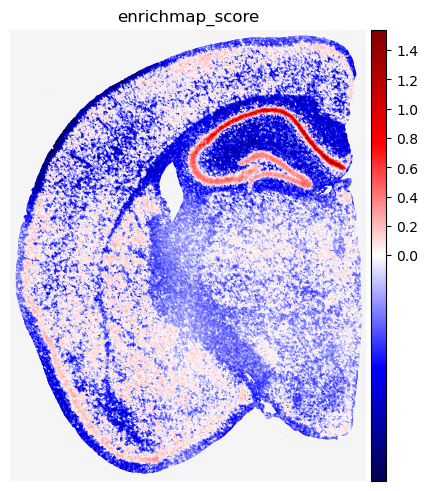

In [14]:
em.pl.spatial_enrichmap(
    adata,
    score_key="enrichmap_score",
    cmap="seismic",
    save="visiumhd_pyramidal_layer_enrichmap.png",
)

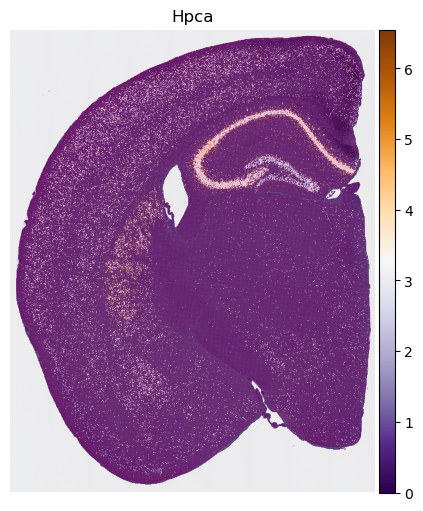

In [ ]:
sq.pl.spatial_scatter(
    adata,
    color="Hpca",
    cmap="PuOr_r",
    save="visiumhd_pyramidal_layer_hpca.png",
    figsize=(5, 5),
    frameon=False,
)

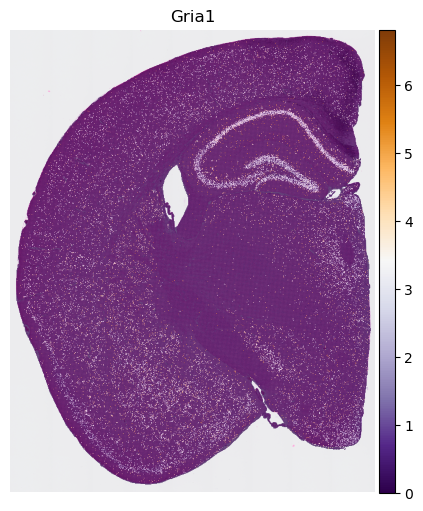

In [26]:
sq.pl.spatial_scatter(
    adata,
    color="Gria1",
    cmap="PuOr_r",
    save="visiumhd_pyramidal_layer_gria1.png",
    figsize=(5, 5),
    frameon=False,
)

In [20]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.5)

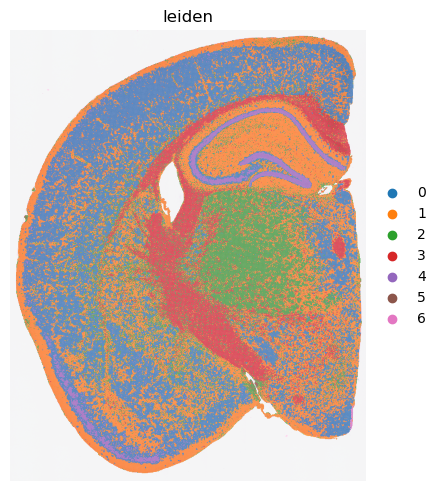

In [24]:
sq.pl.spatial_scatter(
    adata,
    color="leiden",
    save="visiumhd_clusters.png",
    img_alpha=0.5,
    frameon=False,
)